In [ ]:
#################################################################################
####### lecture introductory example
############################################################

Features shape: (100, 2)
Labels shape: (100,)
Training set size: 80 samples
Testing set size: 20 samples


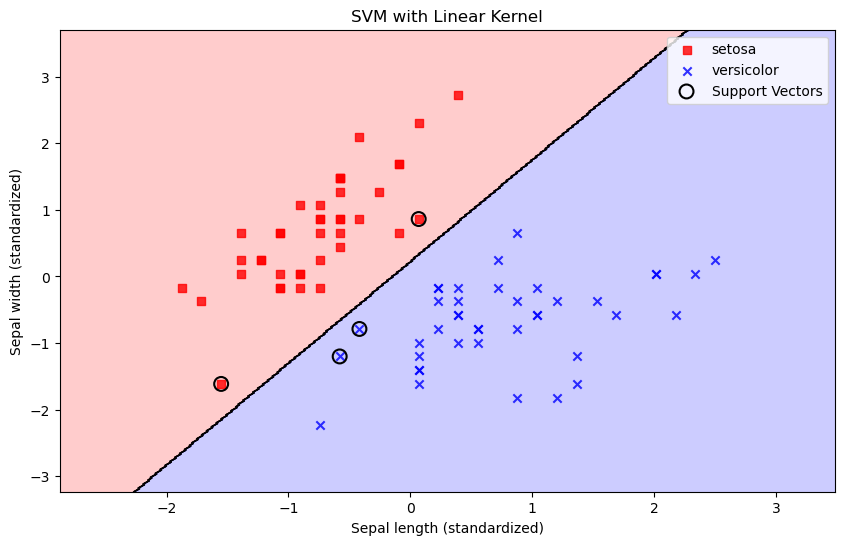

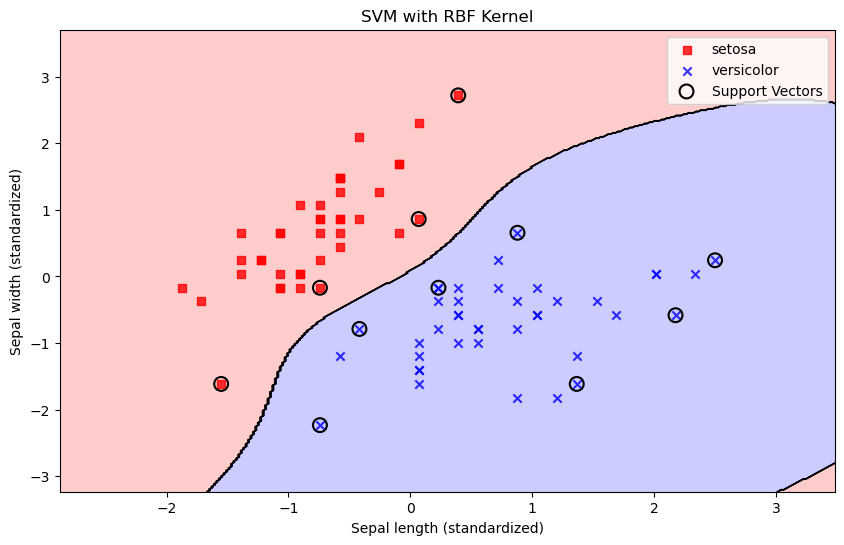

--- SVM with Linear Kernel ---
Confusion Matrix:
[[10  0]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



--- SVM with RBF Kernel ---
Confusion Matrix:
[[10  0]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20





In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

# -------------------- Load and Preprocess the Iris Dataset --------------------

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We take the first two features: sepal length and sepal width
y = iris.target

# For binary classification, select only the first two classes (setosa and versicolor)
binary_class_indices = y < 2  # This creates a boolean array where True corresponds to class 0 and 1
X = X[binary_class_indices]
y = y[binary_class_indices]

# Display the shape of the dataset
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------- Train SVM Classifiers --------------------

# Initialize the SVM classifiers
svm_linear = SVC(kernel='linear', C=5.0, random_state=42)
svm_rbf = SVC(kernel='rbf', gamma='scale', C=5.0, random_state=42)

# Train the classifiers
svm_linear.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)

# -------------------- Visualization Function --------------------

def plot_svm_decision_boundary(model, X, y, title):
    # Define colors and markers
    colors = ['red', 'blue']
    markers = ['s', 'x']
    
    # Define the mesh grid boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=ListedColormap(colors))
    plt.contour(xx, yy, Z, colors='k', linewidths=0.5)
    
    # Plot the training points
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=iris.target_names[cl]
        )
    
    # Highlight support vectors
    plt.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=100,
        facecolors='none',
        edgecolors='k',
        linewidths=1.5,
        label='Support Vectors'
    )
    
    plt.xlabel('Sepal length (standardized)')
    plt.ylabel('Sepal width (standardized)')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot Decision Boundary for Linear SVM
plot_svm_decision_boundary(
    model=svm_linear,
    X=X_train_scaled,
    y=y_train,
    title='SVM with Linear Kernel'
)

# Plot Decision Boundary for RBF SVM
plot_svm_decision_boundary(
    model=svm_rbf,
    X=X_train_scaled,
    y=y_train,
    title='SVM with RBF Kernel'
)

# -------------------- Evaluate the Models --------------------

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"--- {model_name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")
    
# Evaluate Linear SVM
evaluate_model(svm_linear, X_test_scaled, y_test, "SVM with Linear Kernel")

# Evaluate RBF SVM
evaluate_model(svm_rbf, X_test_scaled, y_test, "SVM with RBF Kernel")

Features shape: (100, 2)
Labels shape: (100,)
Training set size: 80 samples
Testing set size: 20 samples


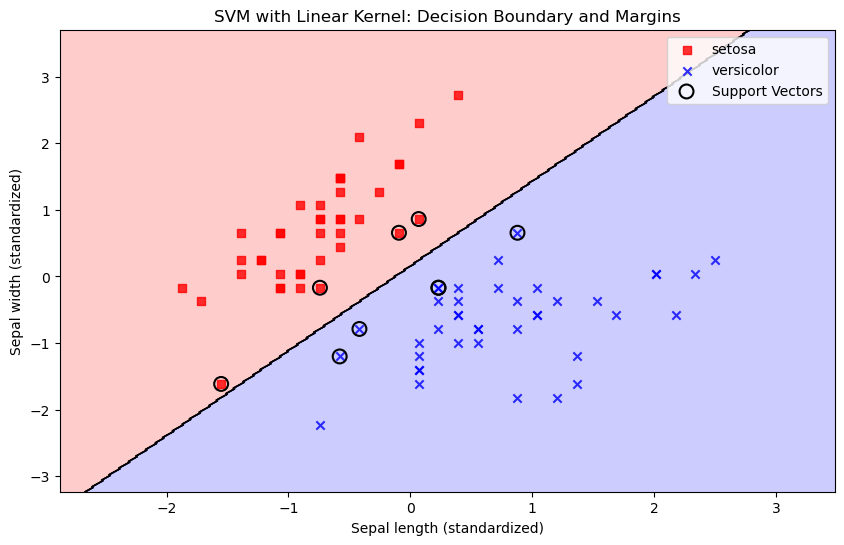

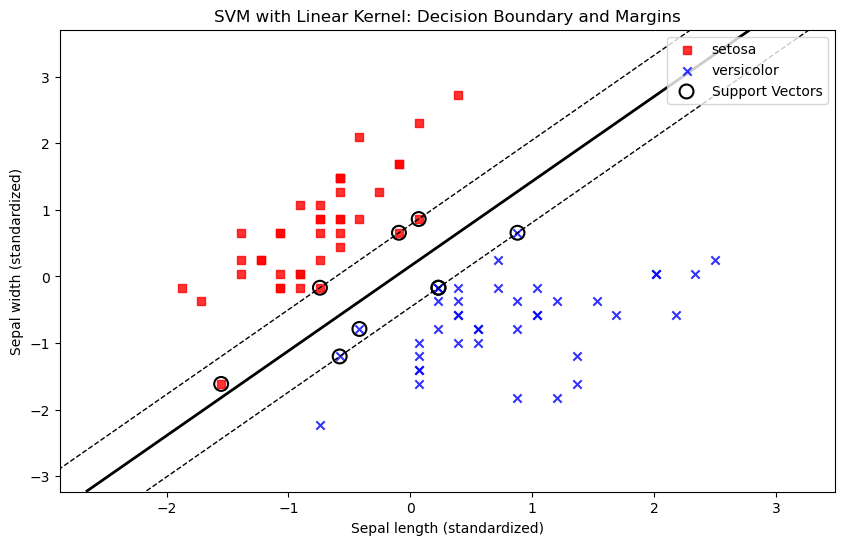

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

# -------------------- Load and Preprocess the Iris Dataset --------------------

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Selecting first two features: sepal length and sepal width
y = iris.target

# For binary classification, select only the first two classes (setosa and versicolor)
binary_class_indices = y < 2  # True for class 0 and 1
X = X[binary_class_indices]
y = y[binary_class_indices]

# Display the shape of the dataset
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------- Train SVM Classifier --------------------

# Initialize the SVM classifier with linear kernel
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier
svm_linear.fit(X_train_scaled, y_train)

# -------------------- Visualization Functions --------------------

def plot_svm_decision_boundary(model, X, y, title):
    # Define colors and markers
    colors = ['red', 'blue']
    markers = ['s', 'x']
    
    # Create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and margins
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=ListedColormap(colors))
    plt.contour(xx, yy, Z, colors='k', linewidths=0.5)
    
    # Plot the training points
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            X[y == cl, 0],
            X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=iris.target_names[cl]
        )
    
    # Highlight support vectors
    plt.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=100,
        facecolors='none',
        edgecolors='k',
        linewidths=1.5,
        label='Support Vectors'
    )
    
    plt.xlabel('Sepal length (standardized)')
    plt.ylabel('Sepal width (standardized)')
    plt.title(title)
    plt.legend()
    plt.show()

def plot_svm_with_margins(model, X, y, title):
    # Define colors and markers
    colors = ['red', 'blue']
    markers = ['s', 'x']
    
    # Create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    
    # Compute the decision function for each point in the grid
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and margins
    plt.figure(figsize=(10, 6))
    # Decision boundary
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')
    # Margins
    plt.contour(xx, yy, Z, levels=[-1, 1], linestyles=['--', '--'], colors='k', linewidths=1)
    
    # Plot the training points
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            X[y == cl, 0],
            X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=iris.target_names[cl]
        )
    
    # Highlight support vectors
    plt.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=100,
        facecolors='none',
        edgecolors='k',
        linewidths=1.5,
        label='Support Vectors'
    )
    
    plt.xlabel('Sepal length (standardized)')
    plt.ylabel('Sepal width (standardized)')
    plt.title(title)
    plt.legend()
    plt.show()

# -------------------- Plot Decision Boundary and Margins --------------------

# Plot Decision Boundary for Linear SVM
plot_svm_decision_boundary(
    model=svm_linear,
    X=X_train_scaled,
    y=y_train,
    title='SVM with Linear Kernel: Decision Boundary and Margins'
)

# Plot Decision Boundary with Margins
plot_svm_with_margins(
    model=svm_linear,
    X=X_train_scaled,
    y=y_train,
    title='SVM with Linear Kernel: Decision Boundary and Margins'
)

Features shape: (100, 2)
Labels shape: (100,)
Training set size: 80 samples
Testing set size: 20 samples


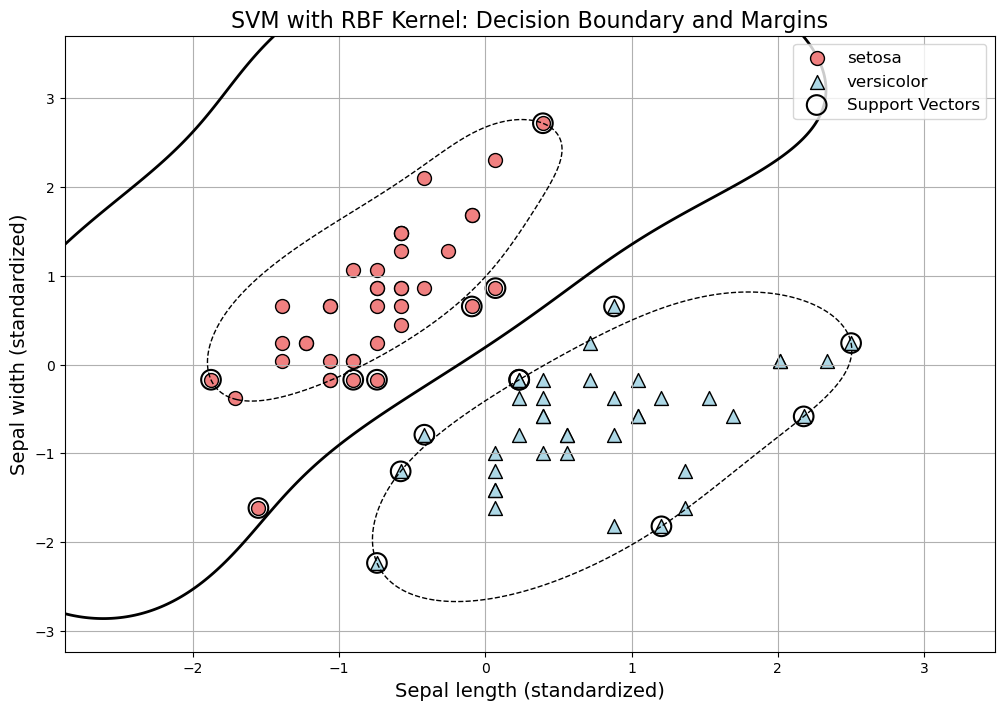

--- SVM with RBF Kernel ---
Confusion Matrix:
[[10  0]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20





In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

# -------------------- Load and Prepare the Iris Dataset --------------------

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Selecting first two features: sepal length and sepal width
y = iris.target

# For binary classification, select only the first two classes (setosa and versicolor)
binary_class_indices = y < 2  # True for class 0 and 1
X = X[binary_class_indices]
y = y[binary_class_indices]

# Display the shape of the dataset
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# -------------------- Split the Dataset --------------------

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# -------------------- Feature Scaling --------------------

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------- Train the SVM Classifier with RBF Kernel --------------------

# Initialize the SVM classifier with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the classifier
svm_rbf.fit(X_train_scaled, y_train)

# -------------------- Visualization Function --------------------

def plot_svm_decision_boundary(model, X, y, title):
    # Define colors and markers
    colors = ['lightcoral', 'lightblue']
    markers = ['o', '^']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    # Compute decision function for the grid
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and margins
    plt.figure(figsize=(12, 8))
    # Decision boundary
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')
    # Margins
    plt.contour(xx, yy, Z, levels=[-1, 1], linestyles=['--', '--'], colors='k', linewidths=1)

    # Plot the training points
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            X[y == cl, 0],
            X[y == cl, 1],
            c=colors[idx],
            marker=markers[idx],
            label=iris.target_names[cl],
            edgecolors='k',
            s=100
        )

    # Highlight support vectors
    plt.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=200,
        facecolors='none',
        edgecolors='k',
        linewidths=1.5,
        label='Support Vectors'
    )

    plt.xlabel('Sepal length (standardized)', fontsize=14)
    plt.ylabel('Sepal width (standardized)', fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# -------------------- Plot Decision Boundary and Margins --------------------

# Plot Decision Boundary with Margins for RBF SVM
plot_svm_decision_boundary(
    model=svm_rbf,
    X=X_train_scaled,
    y=y_train,
    title='SVM with RBF Kernel: Decision Boundary and Margins'
)

# -------------------- Evaluation Function --------------------

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"--- {model_name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")

# -------------------- Evaluate the Model --------------------

# Evaluate RBF SVM
evaluate_model(svm_rbf, X_test_scaled, y_test, "SVM with RBF Kernel")

In [ ]:
#################################################################################
####### Support classifier on Heart data
############################################################

In [8]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# -------------------- On the Heart Data --------------------

# 1. Load the data
heart = pd.read_csv("Heart.csv")

# 2. Remove rows with missing values
heart = heart.dropna()

# 3. Display the first 10 rows
print("First 10 rows of the Heart dataset:")
print(heart.head(10))

# 4. Convert 'AHD' column to categorical (similar to R's factor)
heart['AHD'] = heart['AHD'].astype('category')

# Encode categorical labels as integers
heart['AHD'] = heart['AHD'].cat.codes

# 5. Identify categorical features (excluding the target 'AHD')
categorical_cols = heart.select_dtypes(include=['object', 'category']).columns.tolist()
if 'AHD' in categorical_cols:
    categorical_cols.remove('AHD')

print(f"\nCategorical columns to encode: {categorical_cols}")

# 6. Encode categorical features using One-Hot Encoding
heart_encoded = pd.get_dummies(heart, columns=categorical_cols)

# 7. Split the data into training and testing sets
# Assuming the dataset has 297 rows and you want 207 for training
train_size = 207
random_seed = 1  # To match set.seed(1) in R

# Ensure reproducibility
np.random.seed(random_seed)

# Generate train indices
train_indices = np.random.choice(heart_encoded.index, size=train_size, replace=False)

# Create training and testing sets
train = heart_encoded.loc[train_indices]
test = heart_encoded.drop(train_indices)

# Separate features and target variable
X_train = train.drop('AHD', axis=1)
y_train = train['AHD']

X_test = test.drop('AHD', axis=1)
y_test = test['AHD']

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# -------------------- SVM with Cost=10, Scale=False --------------------

# 8. Train the SVM model with a linear kernel, cost=10, and no scaling
svm_fit_10 = svm.SVC(kernel='linear', C=10, probability=False)
svm_fit_10.fit(X_train, y_train)

# 9. Display a summary of the trained model
print("\nSVM Model Summary (Cost=10, Scale=False):")
print(svm_fit_10)

# Display indices of support vectors
print("\nIndices of Support Vectors:")
print(svm_fit_10.support_)

# 10. Make predictions on the test data
y_pred_10 = svm_fit_10.predict(X_test)

# 11. Create a confusion matrix
conf_matrix_10 = confusion_matrix(y_test, y_pred_10)
print("\nConfusion Matrix (Cost=10, No Scaling):")
print(conf_matrix_10)

# Alternatively, using pandas crosstab for a clearer view
conf_matrix_10_df = pd.crosstab(pd.Series(y_pred_10, name='Predict'),
                                pd.Series(y_test.values, name='Truth'))
print("\nConfusion Matrix using pandas crosstab:")
print(conf_matrix_10_df)

# 12. Calculate and print the accuracy
accuracy_10 = accuracy_score(y_test, y_pred_10)
print(f"\nAccuracy (Cost=10, No Scaling): {accuracy_10:.2f}")

# -------------------- SVM with Cost=5, Scale=True --------------------

# 13. Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 14. Train the SVM model with a linear kernel, cost=5, and scaling
svm_fit_5 = svm.SVC(kernel='linear', C=5, probability=False)
svm_fit_5.fit(X_train_scaled, y_train)

# 15. Make predictions on the scaled test data
y_pred_5 = svm_fit_5.predict(X_test_scaled)

# 16. Create a confusion matrix for the scaled model
conf_matrix_5 = confusion_matrix(y_test, y_pred_5)
print("\nConfusion Matrix (Cost=5, Scaling):")
print(conf_matrix_5)

# Alternatively, using pandas crosstab
conf_matrix_5_df = pd.crosstab(pd.Series(y_pred_5, name='Predict'),
                               pd.Series(y_test.values, name='Truth'))
print("\nConfusion Matrix using pandas crosstab (Cost=5, Scaling):")
print(conf_matrix_5_df)

# 17. Calculate and print the accuracy for the scaled model
accuracy_5 = accuracy_score(y_test, y_pred_5)
print(f"\nAccuracy (Cost=5, Scaling): {accuracy_5:.2f}")

# -------------------- Cross-Validation to Choose the Best Cost Value --------------------

# 18. Define the parameter grid for 'C' (cost) values
param_grid = {'C': [1, 5, 10, 15, 20, 25, 30]}

# 19. Initialize GridSearchCV with SVM, linear kernel, and scaling
# Use 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=svm.SVC(kernel='linear', probability=False),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# 20. Fit GridSearchCV on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# 21. Retrieve the best model
best_model = grid_search.best_estimator_
best_cost = grid_search.best_params_['C']

print(f"\nBest Cost (C) value from Cross-Validation: {best_cost}")

# 22. Make predictions using the best model on the scaled test data
y_pred_best = best_model.predict(X_test_scaled)

# 23. Create a confusion matrix for the best model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix (Best Cost, Scaling):")
print(conf_matrix_best)

# Alternatively, using pandas crosstab
conf_matrix_best_df = pd.crosstab(pd.Series(y_pred_best, name='Predict'),
                                  pd.Series(y_test.values, name='Truth'))
print("\nConfusion Matrix using pandas crosstab (Best Cost, Scaling):")
print(conf_matrix_best_df)

# 24. Calculate and print the accuracy for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nAccuracy (Best Cost={best_cost}, Scaling): {accuracy_best:.2f}")


First 10 rows of the Heart dataset:
   Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   
3   37    1    nonanginal     130   250    0        0    187      0      3.5   
4   41    0    nontypical     130   204    0        2    172      0      1.4   
5   56    1    nontypical     120   236    0        0    178      0      0.8   
6   62    0  asymptomatic     140   268    0        2    160      0      3.6   
7   57    0  asymptomatic     120   354    0        0    163      1      0.6   
8   63    1  asymptomatic     130   254    0        2    147      0      1.4   
9   53    1  asymptomatic     140   203    1        2    155      1      3.1   

   Slope   Ca        Thal  AHD  
0      3  0.0       fixed   No  
1      2  3.0    

In [ ]:
#################################################################################
####### Support vector machine on Heart data
############################################################

In [10]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# -------------------- Load and Preprocess the Heart Data --------------------

# 1. Load the data
heart = pd.read_csv("Heart.csv")

# 2. Remove rows with missing values
heart = heart.dropna()

# 3. Display the first 10 rows
print("First 10 rows of the Heart dataset:")
print(heart.head(10))

# 4. Convert 'AHD' column to categorical (similar to R's factor)
heart['AHD'] = heart['AHD'].astype('category')

# Encode categorical labels as integers (0 and 1)
heart['AHD'] = heart['AHD'].cat.codes

# 5. Identify categorical features (excluding the target 'AHD')
categorical_cols = heart.select_dtypes(include=['object', 'category']).columns.tolist()
if 'AHD' in categorical_cols:
    categorical_cols.remove('AHD')

print(f"\nCategorical columns to encode: {categorical_cols}")

# 6. Encode categorical features using One-Hot Encoding
heart_encoded = pd.get_dummies(heart, columns=categorical_cols)

# 7. Define features and target variable
X = heart_encoded.drop('AHD', axis=1)
y = heart_encoded['AHD']

# 8. Split the data into training and testing sets
# In R, the sample size was 207 out of 297; we'll replicate that
train_size = 207
test_size = heart_encoded.shape[0] - train_size

# Set random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)

# Create a train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_size, test_size=test_size, random_state=random_seed, shuffle=True
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# -------------------- Support Vector Machine with Radial Kernel --------------------

def train_evaluate_svm(kernel, gamma, C, scale_features=True):
    print(f"\nTraining SVM with kernel='{kernel}', gamma={gamma}, C={C}, scale_features={scale_features}")

    # 1. Feature Scaling (only if required)
    if scale_features:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train.values
        X_test_scaled = X_test.values

    # 2. Initialize the SVM model
    svm_model = svm.SVC(kernel=kernel, gamma=gamma, C=C, probability=False)

    # 3. Train the model
    svm_model.fit(X_train_scaled, y_train)

    # 4. Display a summary of the trained model
    print("SVM Model Summary:")
    print(svm_model)

    # 5. Display indices of support vectors (indices relative to the training set)
    print(f"Number of support vectors: {len(svm_model.support_vectors_)}")
    print(f"Support vector indices (from training set): {svm_model.support_}")

    # 6. Make predictions on the test data
    y_pred = svm_model.predict(X_test_scaled)

    # 7. Create a confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Alternatively, using pandas crosstab for a clearer view
    conf_matrix_df = pd.crosstab(pd.Series(y_pred, name='Predict'),
                                 pd.Series(y_test.values, name='Truth'))
    print("\nConfusion Matrix using pandas crosstab:")
    print(conf_matrix_df)

    # 8. Calculate and print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy:.2f}")

    return svm_model, accuracy

# -------------------- SVM with gamma=1 --------------------
svm_model_gamma1, accuracy_gamma1 = train_evaluate_svm(
    kernel='rbf',
    gamma=1,
    C=1,
    scale_features=True  # Scaling is typically beneficial for SVMs
)

# -------------------- SVM with gamma=0.1 --------------------
svm_model_gamma01, accuracy_gamma01 = train_evaluate_svm(
    kernel='rbf',
    gamma=0.1,
    C=1,
    scale_features=True
)

First 10 rows of the Heart dataset:
   Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   
3   37    1    nonanginal     130   250    0        0    187      0      3.5   
4   41    0    nontypical     130   204    0        2    172      0      1.4   
5   56    1    nontypical     120   236    0        0    178      0      0.8   
6   62    0  asymptomatic     140   268    0        2    160      0      3.6   
7   57    0  asymptomatic     120   354    0        0    163      1      0.6   
8   63    1  asymptomatic     130   254    0        2    147      0      1.4   
9   53    1  asymptomatic     140   203    1        2    155      1      3.1   

   Slope   Ca        Thal  AHD  
0      3  0.0       fixed   No  
1      2  3.0    

In [ ]:
#################################################################################
####### ROC curves on training dataset:  LDA and Support Vector Classifier
############################################################

First 10 rows of the Heart dataset:
   Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   
3   37    1    nonanginal     130   250    0        0    187      0      3.5   
4   41    0    nontypical     130   204    0        2    172      0      1.4   
5   56    1    nontypical     120   236    0        0    178      0      0.8   
6   62    0  asymptomatic     140   268    0        2    160      0      3.6   
7   57    0  asymptomatic     120   354    0        0    163      1      0.6   
8   63    1  asymptomatic     130   254    0        2    147      0      1.4   
9   53    1  asymptomatic     140   203    1        2    155      1      3.1   

   Slope   Ca        Thal  AHD  
0      3  0.0       fixed   No  
1      2  3.0    

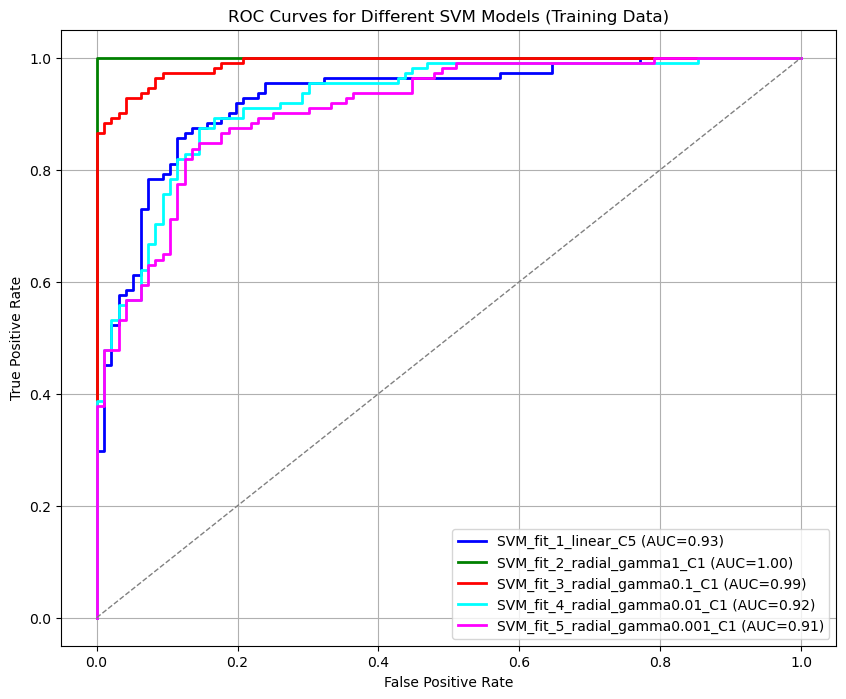


Confusion Matrix (Test Data):
[[48  1]
 [ 9 32]]

Accuracy on Test Data: 0.89


In [16]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# -------------------- Load and Preprocess the Heart Data --------------------

# 1. Load the data
heart = pd.read_csv("Heart.csv")

# 2. Remove rows with missing values
heart = heart.dropna()

# 3. Display the first 10 rows
print("First 10 rows of the Heart dataset:")
print(heart.head(10))

# 4. Convert 'AHD' column to categorical (similar to R's factor)
heart['AHD'] = heart['AHD'].astype('category')

# Encode categorical labels as integers (0 and 1)
heart['AHD'] = heart['AHD'].cat.codes

# 5. Identify categorical features (excluding the target 'AHD')
categorical_cols = heart.select_dtypes(include=['object', 'category']).columns.tolist()
if 'AHD' in categorical_cols:
    categorical_cols.remove('AHD')

print(f"\nCategorical columns to encode: {categorical_cols}")

# 6. Encode categorical features using One-Hot Encoding
heart_encoded = pd.get_dummies(heart, columns=categorical_cols)

# 7. Define features and target variable
X = heart_encoded.drop('AHD', axis=1)
y = heart_encoded['AHD']

# 8. Split the data into training and testing sets
# In R, the sample size was 207 out of 297; we'll replicate that
train_size = 207
test_size = heart_encoded.shape[0] - train_size

# Set random seed for reproducibility (using seed=1 as in R's set.seed(1))
random_seed = 1
np.random.seed(random_seed)

# Create a train-test split with 207 training samples
train_indices = np.random.choice(heart_encoded.index, size=train_size, replace=False)
train = heart_encoded.loc[train_indices]
test = heart_encoded.drop(train_indices)

# Separate features and target variable
X_train = train.drop('AHD', axis=1)
y_train = train['AHD']

X_test = test.drop('AHD', axis=1)
y_test = test['AHD']

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# 9. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------- Support Vector Machine Models --------------------

from sklearn.svm import SVC

# Define models to train: each with specified kernel, gamma, C
model_params = [
    {'name': 'SVM_fit_1_linear_C5', 'kernel': 'linear', 'C':5},
    {'name': 'SVM_fit_2_radial_gamma1_C1', 'kernel': 'rbf', 'gamma':1, 'C':1},
    {'name': 'SVM_fit_3_radial_gamma0.1_C1', 'kernel': 'rbf', 'gamma':0.1, 'C':1},
    {'name': 'SVM_fit_4_radial_gamma0.01_C1', 'kernel': 'rbf', 'gamma':0.01, 'C':1},
    {'name': 'SVM_fit_5_radial_gamma0.001_C1', 'kernel':'rbf','gamma':0.001,'C':1}
]

# Initialize a dictionary to store models and ROC data
models = {}

for params in model_params:
    name = params['name']
    kernel = params['kernel']
    C = params['C']
    gamma = params.get('gamma', 'auto')  # 'gamma' not used for linear
    
    # Initialize SVM model
    if kernel == 'linear':
        clf = svm.SVC(kernel=kernel, C=C, probability=True, decision_function_shape='ovr', random_state=random_seed)
    else:
        clf = svm.SVC(kernel=kernel, C=C, gamma=gamma, probability=True, decision_function_shape='ovr', random_state=random_seed)
    
    # Train the model on scaled training data
    clf.fit(X_train_scaled, y_train)
    
    # Get decision function scores on training set
    # In R code, negative decision.values are used to align with ROCR's expectations
    # To mimic this, we'll negate the decision function scores
    decision_scores = -clf.decision_function(X_train_scaled)
    
    # Store the model and scores
    models[name] = {
        'model': clf,
        'decision_scores': decision_scores
    }

# -------------------- Compute and Plot ROC Curves --------------------

plt.figure(figsize=(10, 8))

colors = ['blue', 'green', 'red', 'cyan', 'magenta']  # Assign colors for the ROC curves

for i, (name, model_info) in enumerate(models.items()):
    decision_scores = model_info['decision_scores']
    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_train, decision_scores)
    roc_auc = 1-auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(tpr, fpr, color=colors[i], lw=2, label=f'{name} (AUC={roc_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0,1], [0,1], color='grey', lw=1, linestyle='--')

# Configure plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different SVM Models (Training Data)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# -------------------- Prediction on Test Data --------------------

# As per the R code, the final prediction is made using 'svmfit' (likely svmfit.1)
# We'll replicate this by selecting the first model: 'SVM_fit_1_linear_C5'

selected_model_name = 'SVM_fit_1_linear_C5'
selected_model = models[selected_model_name]['model']

# Make predictions on test data
ypred = selected_model.predict(X_test_scaled)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, ypred)
print("\nConfusion Matrix (Test Data):")
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test, ypred)
print(f"\nAccuracy on Test Data: {accuracy:.2f}")